In [1]:
%matplotlib inline
import time
import torch
from torch import nn, optim
import torchvision
from PIL import Image

import sys
sys.path.append('..')
import d2lzh_pytorch as d2l
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

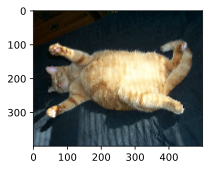

In [2]:
d2l.set_figsize()
img = Image.open('./images/cat1.jpg')
d2l.plt.imshow(img)

In [37]:
def show_images(imgs, num_rows, num_cols, scale=2):
    '''
    显示多张图片
    '''
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [38]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    '''
    对输入的多次运行图像增广方法aug并显示所有结果
    '''
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

- 左右翻转

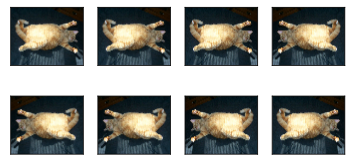

In [39]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

- 上下翻转

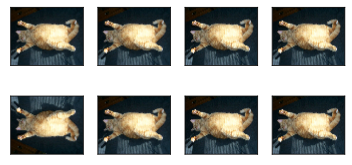

In [40]:
apply(img, torchvision.transforms.RandomVerticalFlip())

- 随机裁剪
- scale:裁剪原面积的10%-100%
- ratio:高和宽之比随机取0.5-2
- 将裁剪后的区域放缩到200像素

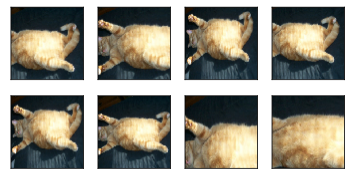

In [41]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

#### 颜色变化

- 将亮度随机变为原亮度的50%（1-0.5）-150%（1+0.5）

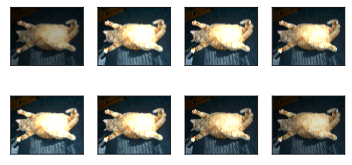

In [43]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

- 改变色调

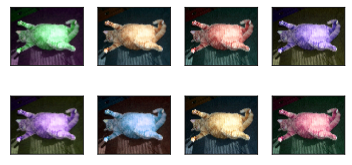

In [44]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

- 对比度

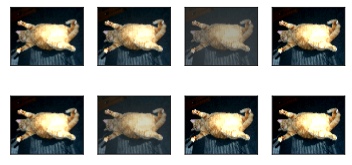

In [45]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

- 饱和度

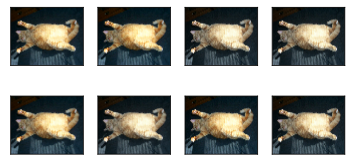

In [46]:
apply(img, torchvision.transforms.ColorJitter(saturation=0.5))

- 同时改变亮度、色调、对比度、饱和度

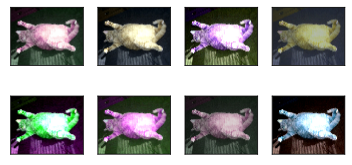

In [47]:
color_aug = torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

#### 叠加多个图像增广方法

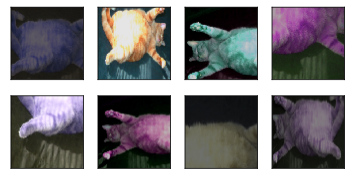

In [48]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug
])
apply(img, augs)